In [2]:
import pandas as pd
data = pd.read_excel('1.employee.xlsx',sheet_name='Sheet1')
data.head()

,employee_id,signing_bonus,salary,degree_level,gender,yrs_experience,manager_id,dept
0,138719,0,273000,Master,M,2,43602.0,engineering
1,3192,0,301000,Bachelor,F,1,87847.0,sales
2,114657,0,261000,Master,F,2,180854.0,sales
3,29039,0,86000,High_School,F,4,88370.0,HR
4,118607,0,126000,Bachelor,F,3,23565.0,sales


In [3]:
data['emp_level'] = data.dept.apply(lambda x: "CEO" if x == "CEO" else "")
data[data.dept == 'CEO']

,employee_id,signing_bonus,salary,degree_level,gender,yrs_experience,manager_id,dept,emp_level
6367,61554,1,700000,PhD,M,7,NaN,CEO,CEO


In [4]:
org_levels = ['CEO','E','VP','D','MM','IC']
for i in range(0,len(org_levels)-1):
  man_id = data[data.emp_level == org_levels[i]].employee_id
  print(org_levels[i])
  #print(manager_id)
  data['emp_level'] = data.apply(lambda x: org_levels[i+1]
                                 if x['manager_id'] in(man_id.values)
                                 else x['emp_level'], axis = 1)

data.head()


CEO
E
VP
D
MM


,employee_id,signing_bonus,salary,degree_level,gender,yrs_experience,manager_id,dept,emp_level
0,138719,0,273000,Master,M,2,43602.0,engineering,IC
1,3192,0,301000,Bachelor,F,1,87847.0,sales,IC
2,114657,0,261000,Master,F,2,180854.0,sales,IC
3,29039,0,86000,High_School,F,4,88370.0,HR,IC
4,118607,0,126000,Bachelor,F,3,23565.0,sales,IC


In [ ]:
data.to_csv("data.csv")

In [ ]:
data.head()

,employee_id,signing_bonus,salary,degree_level,gender,yrs_experience,manager_id,dept,emp_level
0,138719,0,273000,Master,M,2,43602.0,engineering,IC
1,3192,0,301000,Bachelor,F,1,87847.0,sales,IC
2,114657,0,261000,Master,F,2,180854.0,sales,IC
3,29039,0,86000,High_School,F,4,88370.0,HR,IC
4,118607,0,126000,Bachelor,F,3,23565.0,sales,IC


In [5]:
from collections import defaultdict

def build_reporting_structure(reporting_struct):
    reporting_structure = defaultdict(list)
    for _, row in reporting_struct.iterrows():
        reporting_structure[row['manager_id']].append(row['employee_id'])
    return reporting_structure

In [6]:
def get_org_size(manager_id, reporting_structure):
    #manager_id = row['manager_id']
    #print(manager_id)
    size = 1
    for employee in reporting_structure[manager_id]:
        #print(employee)
        size += get_org_size(employee, reporting_structure)

    return size

In [7]:
reporting_structure = build_reporting_structure(data[['employee_id','manager_id']])

In [8]:
data['org_size'] = data['employee_id'].apply(lambda x: get_org_size(x,reporting_structure))-1

In [9]:
data.tail()

,employee_id,signing_bonus,salary,degree_level,gender,yrs_experience,manager_id,dept,emp_level,org_size
9995,55261,0,307000,Bachelor,M,4,81111.0,engineering,IC,0
9996,84604,0,302000,PhD,M,6,83032.0,marketing,IC,0
9997,193115,1,132000,Bachelor,M,4,8663.0,sales,IC,0
9998,14249,0,77000,PhD,M,4,121527.0,marketing,IC,0
9999,72227,0,178000,Master,M,1,193518.0,sales,IC,0


In [ ]:
data.to_csv('data11.csv')

In [ ]:
### Building Model to Predict Salary

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
import os as os
from itertools import product
import scipy.stats as ss
wr.filterwarnings('ignore')

In [122]:
data_to_work = data[['degree_level', 'gender', 'dept', 'emp_level','signing_bonus', 'salary', 'yrs_experience', 'org_size']]

In [123]:
data_to_work['signing_bonus'] = data_to_work['signing_bonus'].astype(object)
print(data_to_work.dtypes)

degree_level      object
gender            object
dept              object
emp_level         object
signing_bonus     object
salary             int64
yrs_experience     int64
org_size           int64
dtype: object


In [17]:
cat_cols=data_to_work.select_dtypes(include=['object']).columns
num_cols = data_to_work.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['degree_level', 'gender', 'dept', 'emp_level', 'signing_bonus'], dtype='object')
Numerical Variables:
['salary', 'yrs_experience', 'org_size']


salary
Skew : 0.41


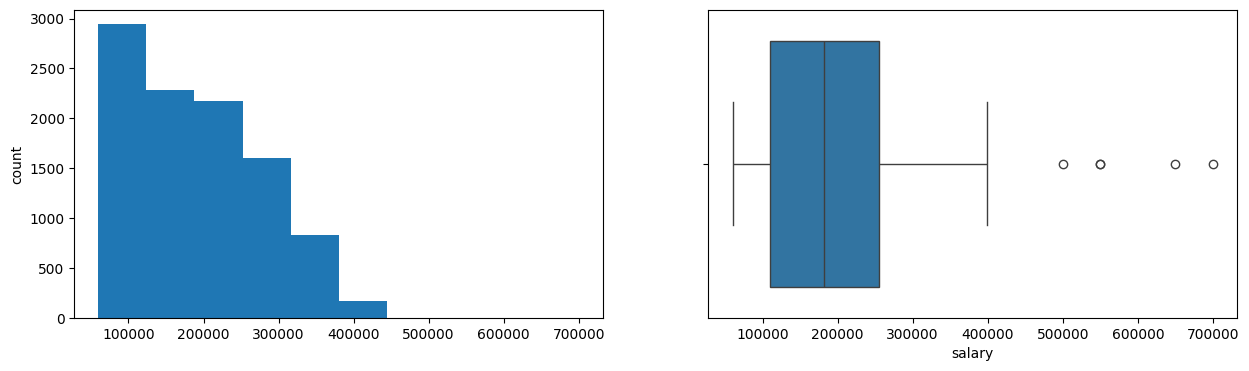

yrs_experience
Skew : 2.76


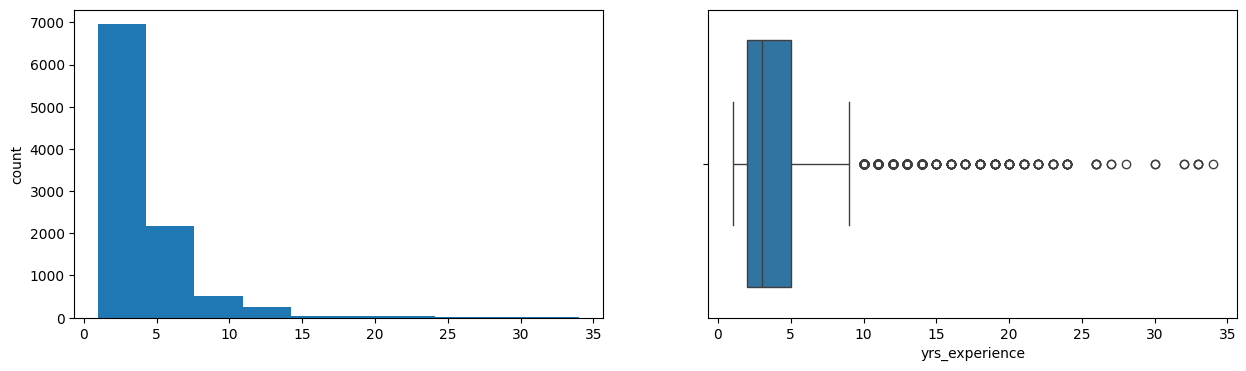

org_size
Skew : 71.89


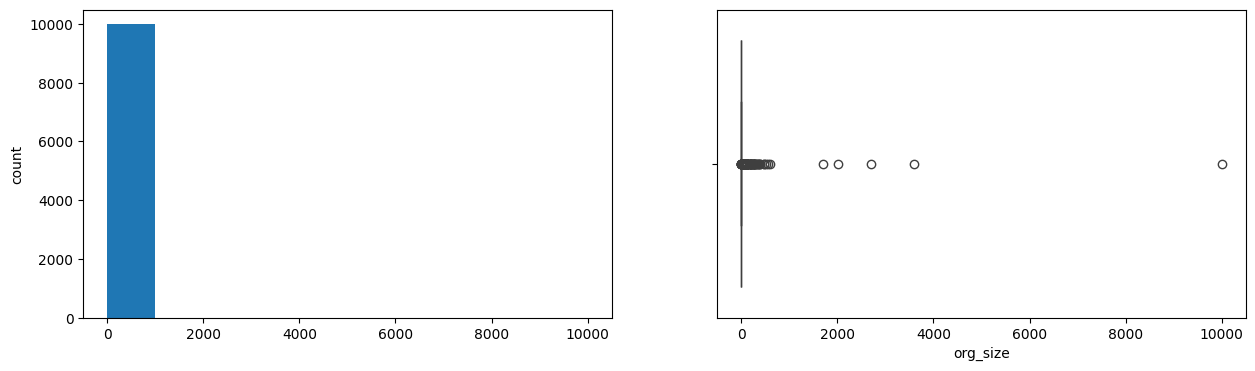

In [18]:
for col in num_cols:
    print(col)
    print('Skew :', round(data[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    data[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.show()

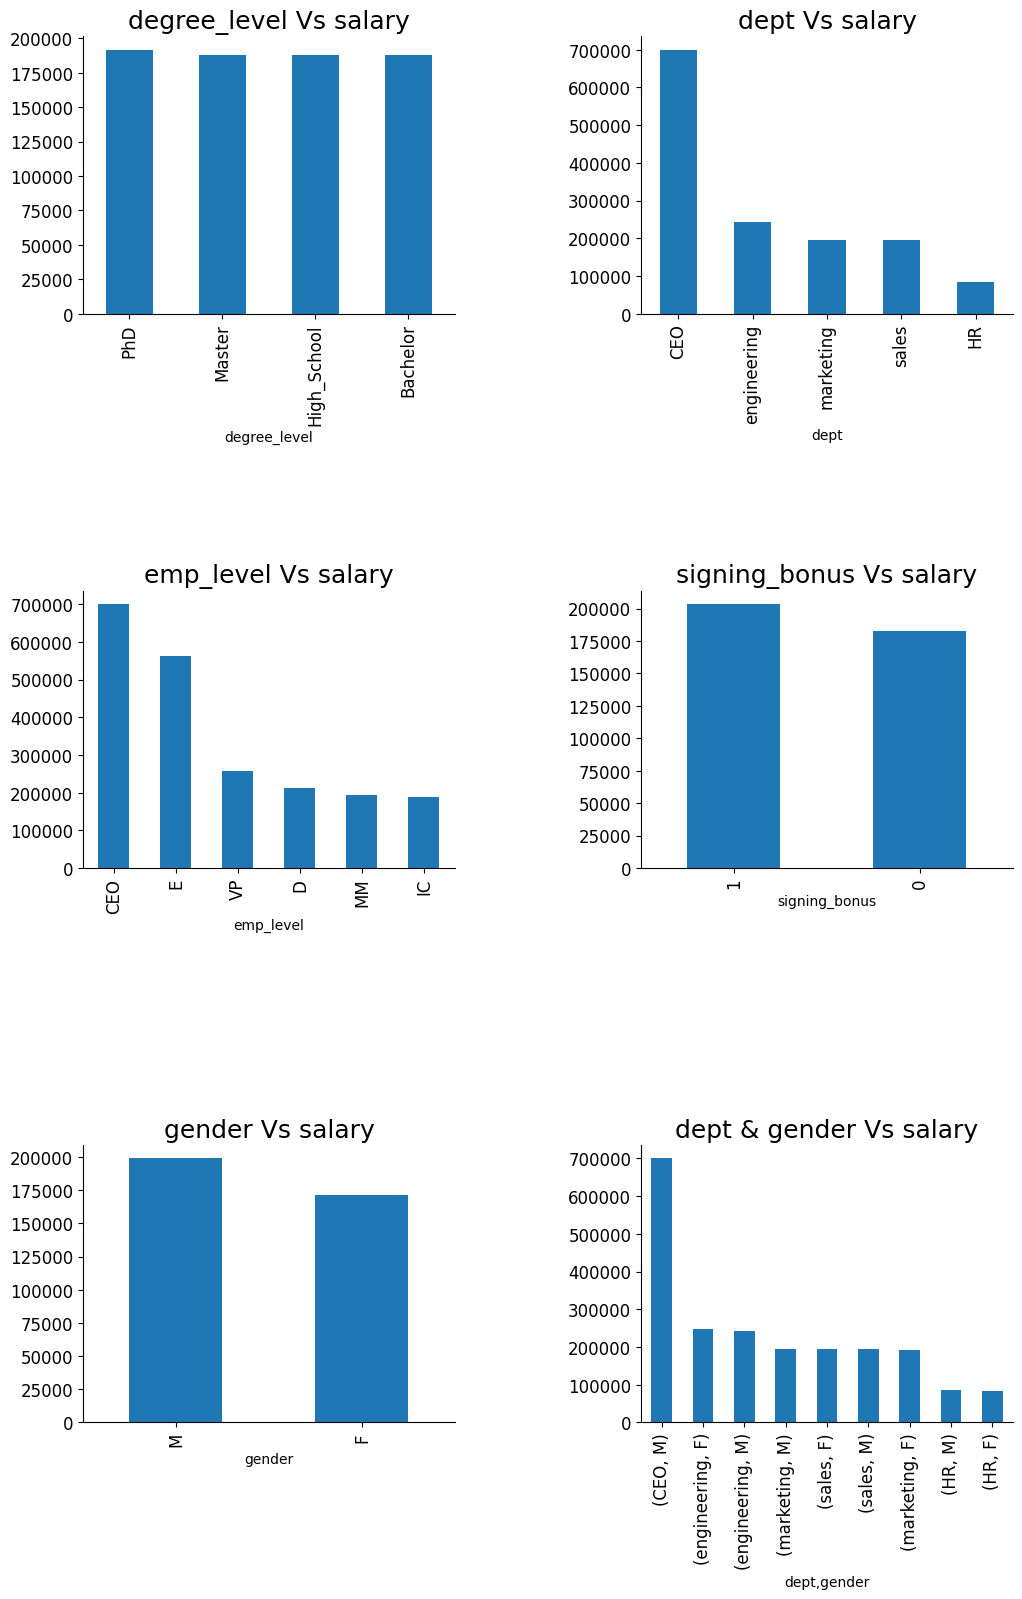

In [27]:
fig, axarr = plt.subplots(3, 2, figsize=(12, 18))
data_to_work.groupby('degree_level')['salary'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][0], fontsize=12)
axarr[0][0].set_title("degree_level Vs salary", fontsize=18)
data_to_work.groupby('dept')['salary'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][1], fontsize=12)
axarr[0][1].set_title("dept Vs salary", fontsize=18)
data_to_work.groupby('emp_level')['salary'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][0], fontsize=12)
axarr[1][0].set_title("emp_level Vs salary", fontsize=18)
data_to_work.groupby('signing_bonus')['salary'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][1], fontsize=12)
axarr[1][1].set_title("signing_bonus Vs salary", fontsize=18)
data_to_work.groupby('gender')['salary'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[2][0], fontsize=12)
axarr[2][0].set_title("gender Vs salary", fontsize=18)
data_to_work.groupby(['dept','gender'])['salary'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[2][1], fontsize=12)
axarr[2][1].set_title("dept & gender Vs salary", fontsize=18)
plt.subplots_adjust(hspace=1.0)
plt.subplots_adjust(wspace=.5)
sns.despine()

<Figure size 1300x1700 with 0 Axes>

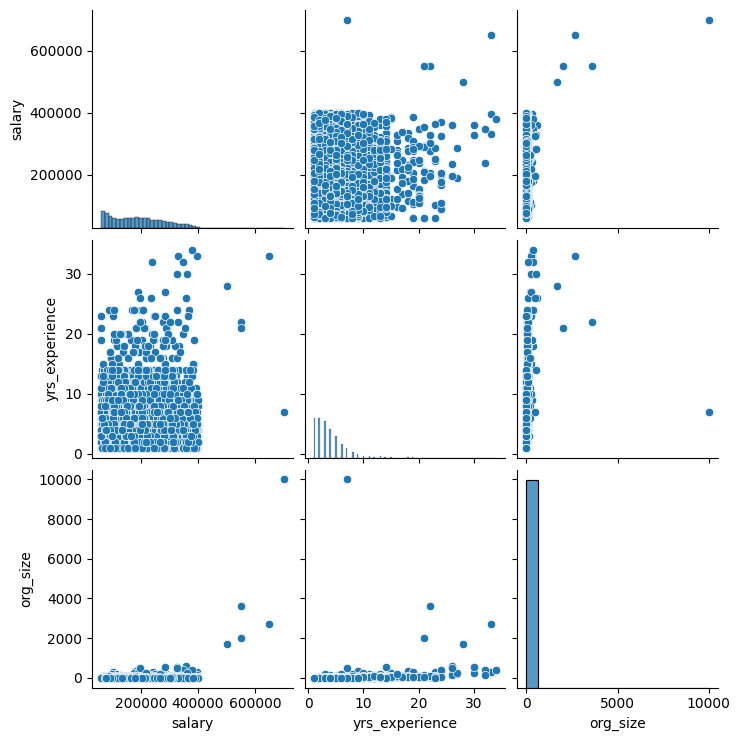

In [22]:
plt.figure(figsize=(13,17))
sns.pairplot(data=data_to_work.drop(cat_cols,axis=1))
plt.show()

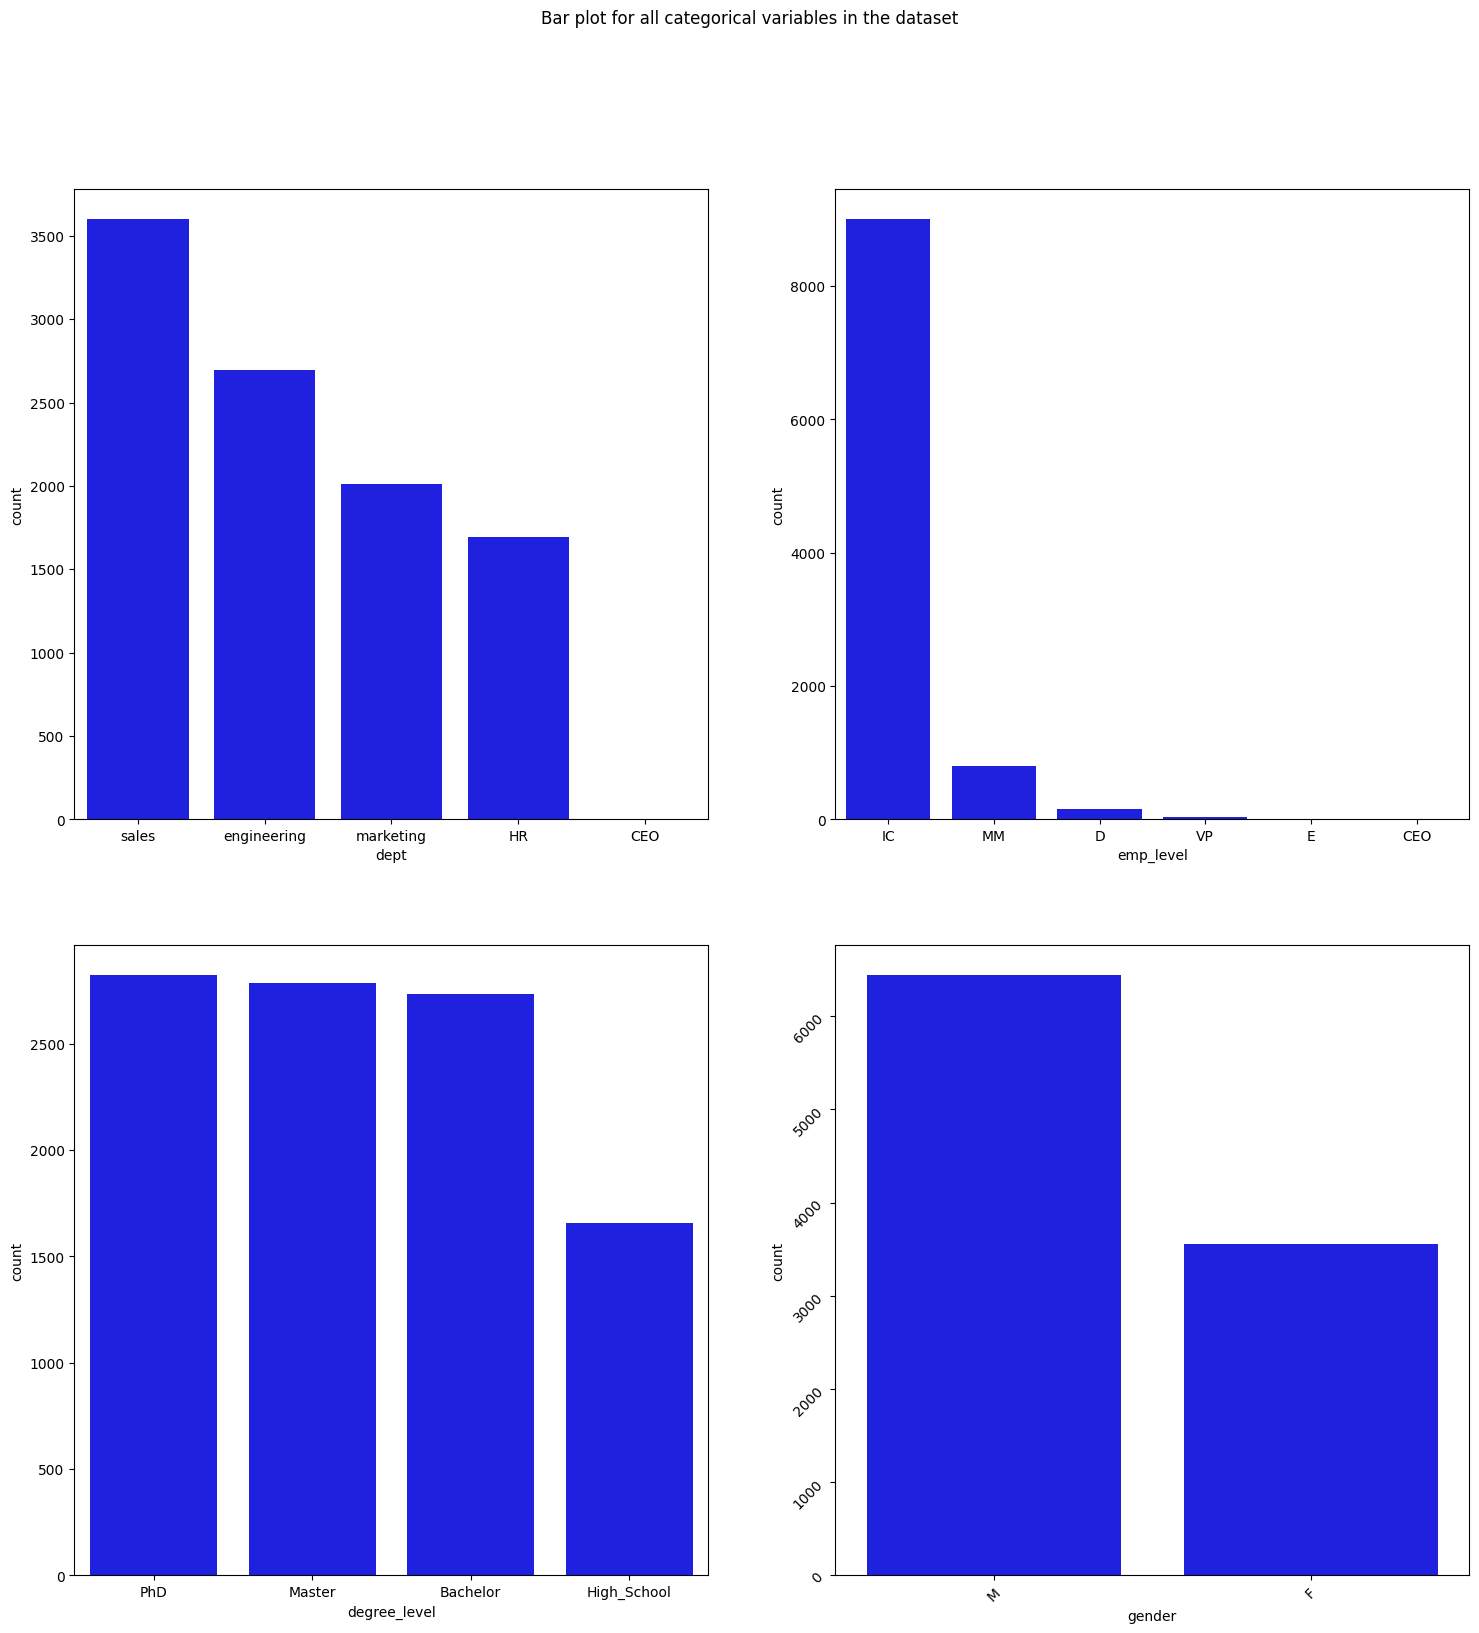

In [31]:
fig, axes = plt.subplots(2, 2, figsize = (18, 18))
fig.suptitle('Bar plot for all categorical variables in the dataset')
sns.countplot(ax = axes[0, 0], x = 'dept', data = data_to_work, color = 'blue',
              order = data_to_work['dept'].value_counts().index);
sns.countplot(ax = axes[0, 1], x = 'emp_level', data = data_to_work, color = 'blue',
              order = data_to_work['emp_level'].value_counts().index);
sns.countplot(ax = axes[1, 0], x = 'degree_level', data = data_to_work, color = 'blue',
              order = data_to_work['degree_level'].value_counts().index);
sns.countplot(ax = axes[1, 1], x = 'gender', data = data_to_work, color = 'blue',
              order = data_to_work['gender'].value_counts().index);
axes[1][1].tick_params(labelrotation=45);


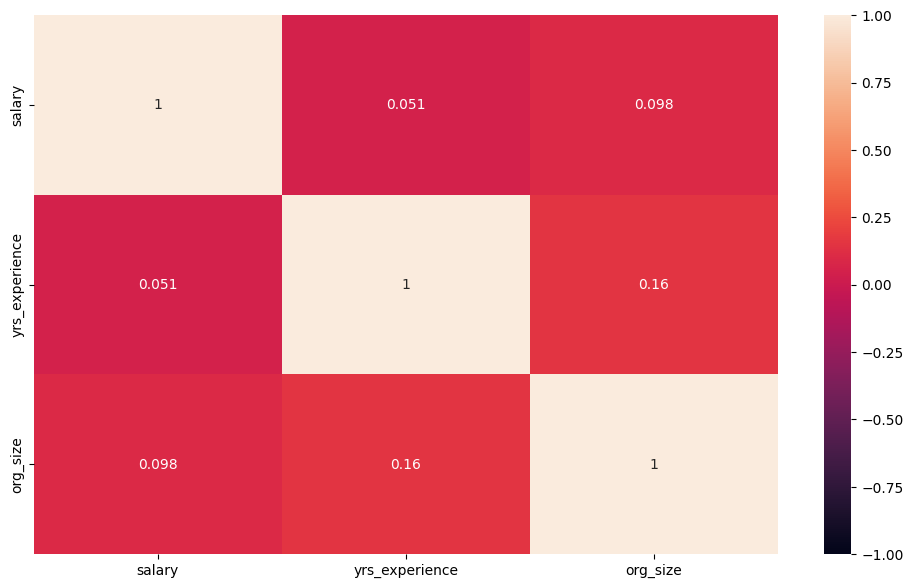

In [37]:
plt.figure(figsize=(12, 7))
sns.heatmap(data_to_work.drop(cat_cols,axis=1).corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

In [35]:
df_cat = data_to_work[cat_cols]
cat_var_prod = list(product(cat_cols,cat_cols, repeat = 1))
result = []
for i in cat_var_prod:
  if i[0] != i[1]:
    result.append((i[0],i[1],list(ss.chi2_contingency(pd.crosstab(
                              df_cat[i[0]], df_cat[i[1]])))[1]))

chi_test_output = pd.DataFrame(result, columns = ['var1', 'var2',
                                                       'coeff'])
## Using pivot function to convert the above DataFrame into a crosstab
chi_test_output.pivot(index='var1', columns='var2', values='coeff')

var2,degree_level,dept,emp_level,gender,signing_bonus
var1,,,,,
degree_level,NaN,2.973274e-01,8.975344e-18,8.390118e-01,7.343265e-01
dept,2.973274e-01,NaN,0.000000e+00,6.500299e-148,1.379058e-72
emp_level,8.975344e-18,0.000000e+00,NaN,1.601005e-01,3.424954e-03
gender,8.390118e-01,6.500299e-148,1.601005e-01,NaN,1.476228e-06
signing_bonus,7.343265e-01,1.379058e-72,3.424954e-03,1.476228e-06,NaN


In [ ]:
#Above result shows strong relationship between Dept and Gender
# Based on the understanding of above EDA we will build a model

In [60]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import cross_val_score

In [175]:
data_to_work1 = data_to_work[(data_to_work.emp_level != "IC") & (data_to_work.emp_level != "CEO")]
#data_to_work1 = data_to_work[(data_to_work.emp_level != "CEO")] #Exclude CEO
#data_to_work1 = data_to_work[(data_to_work.emp_level == "IC")] #Only IC
#data_to_work1 = data_to_work # All Data
print(data_to_work1.shape)
X = data_to_work1[[#'emp_level',
                   'gender',
                   'degree_level',
                   'dept',
                   'yrs_experience']]  # Features to include
y = data_to_work1['salary']  # Target

(999, 8)


In [46]:
data.degree_level.unique()

array(['Master', 'Bachelor', 'High_School', 'PhD'], dtype=object)

In [176]:
#ordinal_encoder1 = OrdinalEncoder(categories=[['IC', 'MM', 'D', 'VP','E', 'CEO']])
#X['emp_level'] = ordinal_encoder1.fit_transform(X[['emp_level']])

ordinal_encoder2 = OrdinalEncoder(categories=[['High_School','Bachelor','Master','PhD']])
X['degree_level'] = ordinal_encoder2.fit_transform(X[['degree_level']])

X1 = pd.get_dummies(X, columns=['dept','gender'], drop_first=True)
#X1 = X

X1.head()

,degree_level,yrs_experience,dept_engineering,dept_marketing,dept_sales,gender_M
6,3.0,12,True,False,False,True
11,3.0,10,False,False,True,True
15,1.0,13,False,False,False,False
18,2.0,7,False,True,False,True
52,1.0,10,False,False,False,True


In [177]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=101)

In [86]:
rf = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("Best Hyperparameters: ", grid_search.best_params_)

KeyboardInterrupt: 

In [147]:
def calculate_mape(y_true, y_pred):
    # Avoid division by zero
    non_zero_indices = y_true != 0
    mape = np.mean(np.abs((y_true[non_zero_indices] - y_pred[non_zero_indices]) / y_true[non_zero_indices])) * 100
    return mape

In [178]:
#best_rf = grid_search.best_estimator_

best_rf = RandomForestRegressor(n_estimators=300,
                           max_depth = 10,
                           random_state=42)
best_rf.fit(X_train, y_train)

#cv_scores = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
#print("Cross-validated MAE: ", np.mean(cv_scores))

y_pred = best_rf.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Calculate MAPE
mape = calculate_mape(y_test, y_pred)

print(f"MAPE: {mape:.2f}%")

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-Squared: {r2}")

MAPE: 42.27%
Mean Absolute Error: 67803.3299665215
Mean Squared Error: 7634102704.222637
Root Mean Squared Error: 87373.35236914421
R-Squared: 0.16691479645158858


<Axes: >

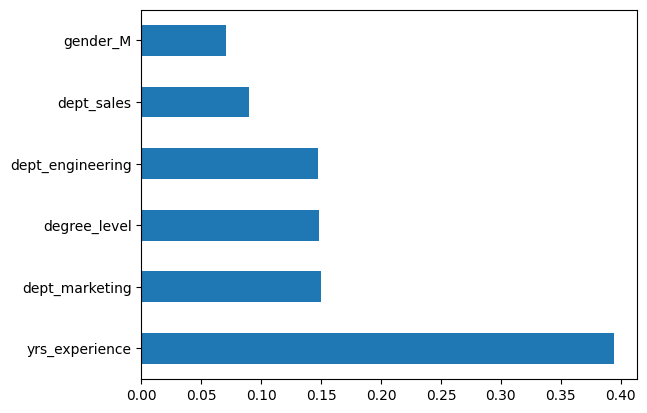

In [179]:
feat_importances = pd.Series(best_rf.feature_importances_, index=X_test.columns)
feat_importances.nlargest(15).plot(kind='barh')

In [180]:
feat_importances

,0
degree_level,0.148209
yrs_experience,0.394249
dept_engineering,0.147386
dept_marketing,0.149968
dept_sales,0.089528
gender_M,0.070661


In [118]:
X1.head()

,emp_level,degree_level,yrs_experience,dept_engineering,dept_marketing,dept_sales,gender_M
6,1.0,3.0,12,True,False,False,True
11,1.0,3.0,10,False,False,True,True
15,1.0,1.0,13,False,False,False,False
18,1.0,2.0,7,False,True,False,True
52,1.0,1.0,10,False,False,False,True


In [119]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X_with_const = add_constant(X1)
X_with_const['gender_M'] = X_with_const['gender_M'].astype(int)
X_with_const['dept_engineering'] = X_with_const['dept_engineering'].astype(int)
X_with_const['dept_marketing'] = X_with_const['dept_marketing'].astype(int)
X_with_const['dept_sales'] = X_with_const['dept_sales'].astype(int)

vif_data = pd.DataFrame()
vif_data['Feature'] = X_with_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

# Display VIF values
print(vif_data)

            Feature        VIF
0             const  15.970416
1         emp_level   1.615177
2      degree_level   1.017798
3    yrs_experience   1.619431
4  dept_engineering   1.948548
5    dept_marketing   1.806110
6        dept_sales   2.040302
7          gender_M   1.058549
